# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd

# EDA
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

import warnings
warnings.filterwarnings("ignore")

# Data Preparation

In [2]:
dataset = pd.read_csv('combined.csv')
X = dataset.iloc[:, 0: -1].values
y = dataset.iloc[:, -1].values

In [3]:
dataset.head()

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,defects
0,8,2,0,8,31,28,1,7,1,2.000000,...,0.000000,0,0.588235,0.347222,1,1,48.250000,7,3.1250,1
1,5,0,0,9,17,10,2,8,2,2.000000,...,0.000000,0,0.000000,0.450000,0,0,18.400000,2,1.0000,0
2,1,1,0,0,1,0,0,0,1,2.000000,...,0.000000,0,0.000000,1.000000,0,0,0.000000,1,1.0000,0
3,13,3,0,41,73,50,5,41,5,0.892857,...,0.714286,0,0.645161,0.250000,1,1,24.923077,5,1.6154,0
4,7,2,0,6,13,17,4,2,7,0.750000,...,1.000000,1,0.333333,0.428571,0,0,5.285714,1,0.8571,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5113 entries, 0 to 5112
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   wmc      5113 non-null   int64  
 1   dit      5113 non-null   int64  
 2   noc      5113 non-null   int64  
 3   cbo      5113 non-null   int64  
 4   rfc      5113 non-null   int64  
 5   lcom     5113 non-null   int64  
 6   ca       5113 non-null   int64  
 7   ce       5113 non-null   int64  
 8   npm      5113 non-null   int64  
 9   lcom3    5113 non-null   float64
 10  loc      5113 non-null   int64  
 11  dam      5113 non-null   float64
 12  moa      5113 non-null   int64  
 13  mfa      5113 non-null   float64
 14  cam      5113 non-null   float64
 15  ic       5113 non-null   int64  
 16  cbm      5113 non-null   int64  
 17  amc      5113 non-null   float64
 18  max_cc   5113 non-null   int64  
 19  avg_cc   5113 non-null   float64
 20  defects  5113 non-null   int64  
dtypes: float64(6),

# Feature Scaling

In [5]:
sc = StandardScaler()
X = sc.fit_transform(X)

# Splitting the dataset into the Training set and Test set

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Training the Kernel SVM model on the Training set

In [7]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

# Predicting the Test set results

In [8]:
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix

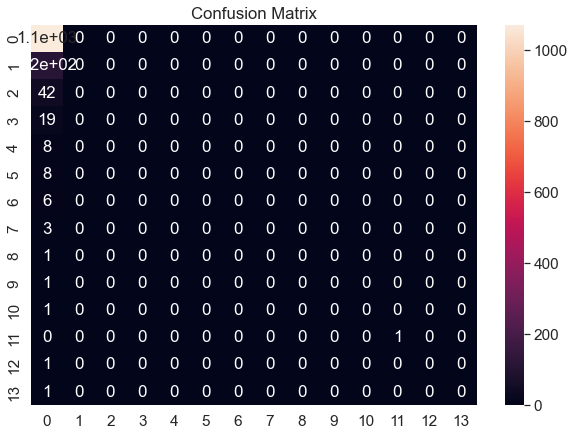

In [9]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True)
plt.show()

# Applying k-Fold Cross Validation

In [10]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 84.35 %
Standard Deviation: 0.24 %


# Applying k-Fold Cross Validation with Shuffle Split

In [11]:
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, 	cv = cv)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 84.09 %
Standard Deviation: 1.12 %
